In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
mat = loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
m = len(y)

In [4]:
digits = load_digits()

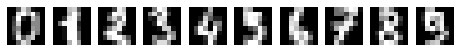

In [5]:
fig, axis = plt.subplots(1, 10, figsize = (8, 8))
plt.gray()
for i in range(10):
        axis[i].matshow(digits.images[i])
        axis[i].axis("off")

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LogisticRegression(C = 2, solver='liblinear',class_weight='balanced', max_iter=500)

In [68]:
model.fit(X_train, y_train.ravel())

LogisticRegression(C=2, class_weight='balanced', max_iter=500,
                   solver='liblinear')

In [84]:
print(model.score(X, y)*100,"%")


94.46 %


In [87]:
y_predicted = model.predict(X)
cm = confusion_matrix(y, y_predicted)
cm

array([[492,   1,   0,   0,   2,   0,   0,   5,   0,   0],
       [  5, 457,   4,   5,   4,   3,   5,  13,   3,   1],
       [  2,  10, 460,   0,  13,   1,   5,   4,   5,   0],
       [  2,   2,   0, 473,   0,   4,   0,   3,  16,   0],
       [  1,   3,  11,   4, 465,   6,   0,   5,   3,   2],
       [  2,   0,   0,   0,   5, 486,   0,   4,   0,   3],
       [  2,   3,   0,   3,   1,   0, 477,   1,  12,   1],
       [  6,   7,   8,   3,   6,   3,   1, 460,   5,   1],
       [  3,   2,   4,   7,   3,   1,  12,   6, 458,   4],
       [  0,   0,   1,   1,   0,   0,   1,   1,   1, 495]])

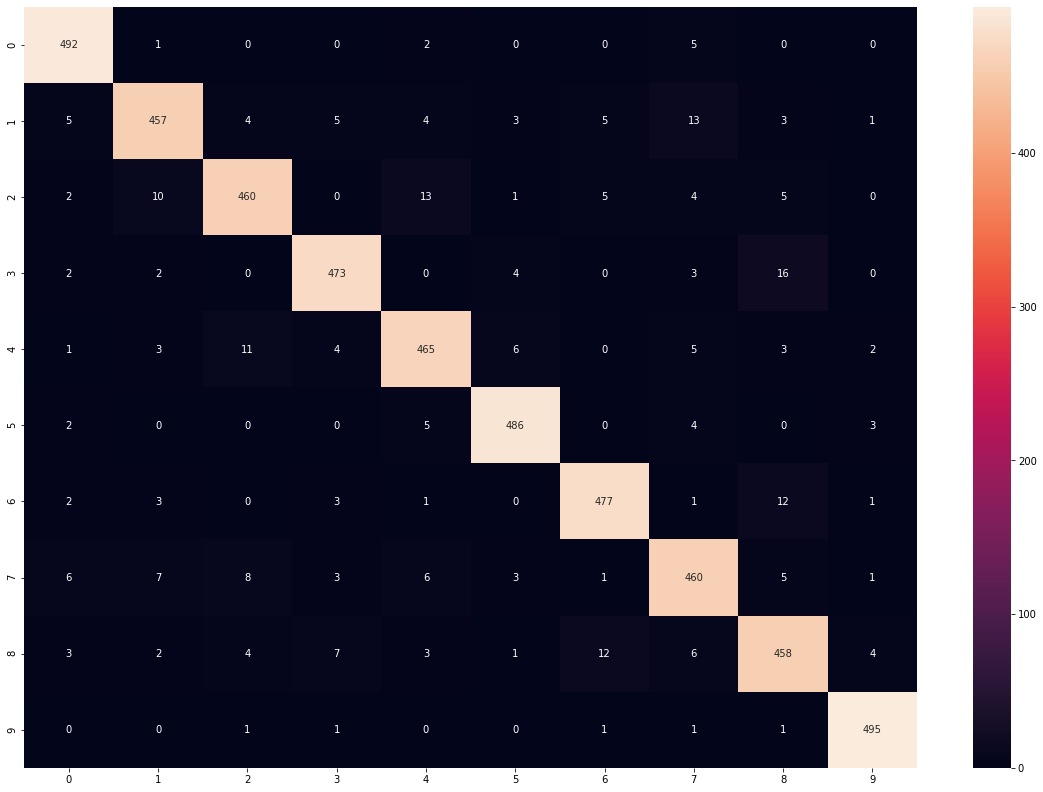

In [90]:
import seaborn as sn
plt.figure(figsize = (20,14))
sn.heatmap(cm, annot = True, fmt = 'g')#fmt = 'g' shows full int else it would be in 4.92e+100 form
plt.show()